In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(42)

In [3]:
S0 = 100      # Initial stock price
r = 0.05      # Risk-free interest rate
sigma = 0.2   # Volatility
T = 1.0       # Time to maturity (years)
K = 100       # Strike price
N_steps = 250 # Time steps for GBM

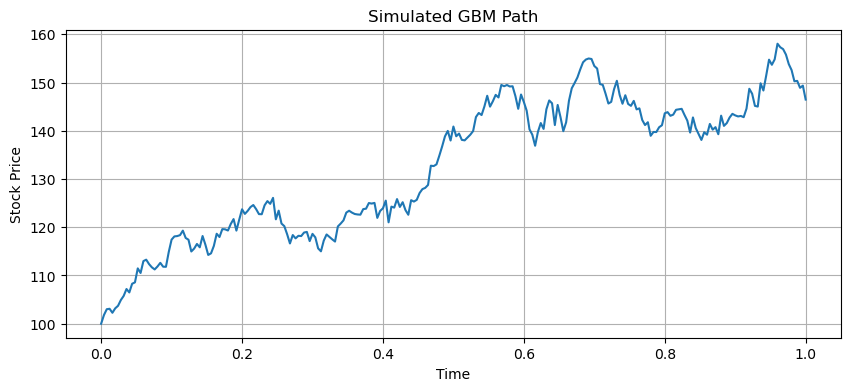

In [ ]:
def simulate_gbm_path(S0, r, sigma, T, N_steps):
    dt = T / N_steps
    t = np.linspace(0, T, N_steps + 1)
    W = np.random.standard_normal(N_steps)
    W = np.cumsum(np.sqrt(dt) * W)
    W = np.insert(W, 0, 0.0)
    S = S0 * np.exp((r - 0.5 * sigma**2) * t + sigma * W)
    return t, S

t, S = simulate_gbm_path(S0, r, sigma, T, N_steps)

plt.figure(figsize=(10, 4))
plt.plot(t, S)
plt.title("Simulated GBM Path")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.savefig("gbm_path.png")
plt.grid(True)
plt.show()

In [9]:
def monte_carlo_call_price(S0, K, r, sigma, T, N_sim=100000):
    Z = np.random.standard_normal(N_sim)
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
    payoff = np.maximum(ST - K, 0)
    return np.exp(-r * T) * np.mean(payoff)

mc_price = monte_carlo_call_price(S0, K, r, sigma, T)
print(f"Monte Carlo Call Price: {mc_price:.4f}")

Monte Carlo Call Price: 10.4683


In [10]:
def black_scholes_call(S0, K, T, r, sigma):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

bs_price = black_scholes_call(S0, K, T, r, sigma)
print(f"Black-Scholes Call Price: {bs_price:.4f}")

Black-Scholes Call Price: 10.4506


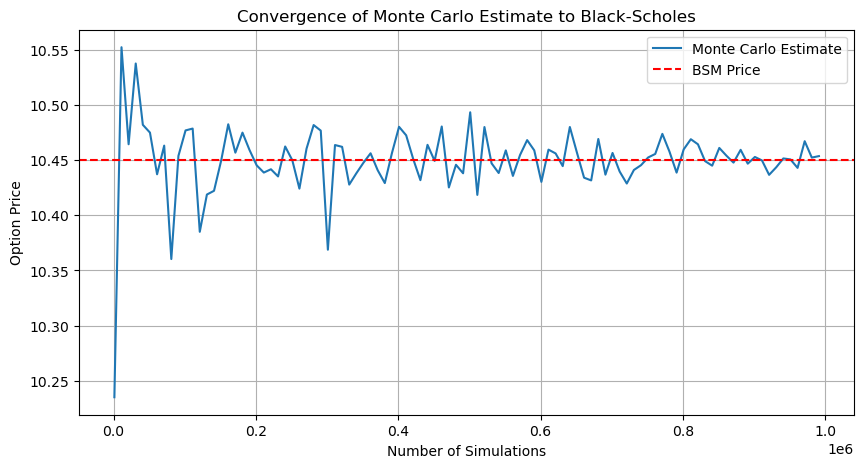

In [15]:
sim_counts = np.arange(1000, 1000000, 10000)
prices = [monte_carlo_call_price(S0, K, r, sigma, T, N) for N in sim_counts]

plt.figure(figsize=(10, 5))
plt.plot(sim_counts, prices, label="Monte Carlo Estimate")
plt.axhline(bs_price, color='red', linestyle='--', label="BSM Price")
plt.title("Convergence of Monte Carlo Estimate to Black-Scholes")
plt.xlabel("Number of Simulations")
plt.ylabel("Option Price")
plt.legend()
plt.grid(True)
plt.savefig("monte_carlo_convergence.png")
plt.show()

### ✅ Summary

- GBM was simulated using the exact analytical formula:
  $$
  S_t = S_0 \exp\left((r - \frac{1}{2}\sigma^2)t + \sigma W_t\right)
  $$
- Option price under risk-neutral measure was estimated using Monte Carlo simulation.
- Monte Carlo price converges to Black-Scholes formula as number of simulations increases.
- This verifies the consistency of risk-neutral valuation and GBM under continuous-time modeling.